In [1]:
import tensorflow as tf

In [3]:
def load_and_preprocess_data():

    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape(-1, 28 * 28)
    x_test = x_test.reshape(-1, 28 * 28)
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

In [5]:
def create_model():
 model = tf.keras.Sequential([
 tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(256, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10, activation='softmax')
 ])
 model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

 return model

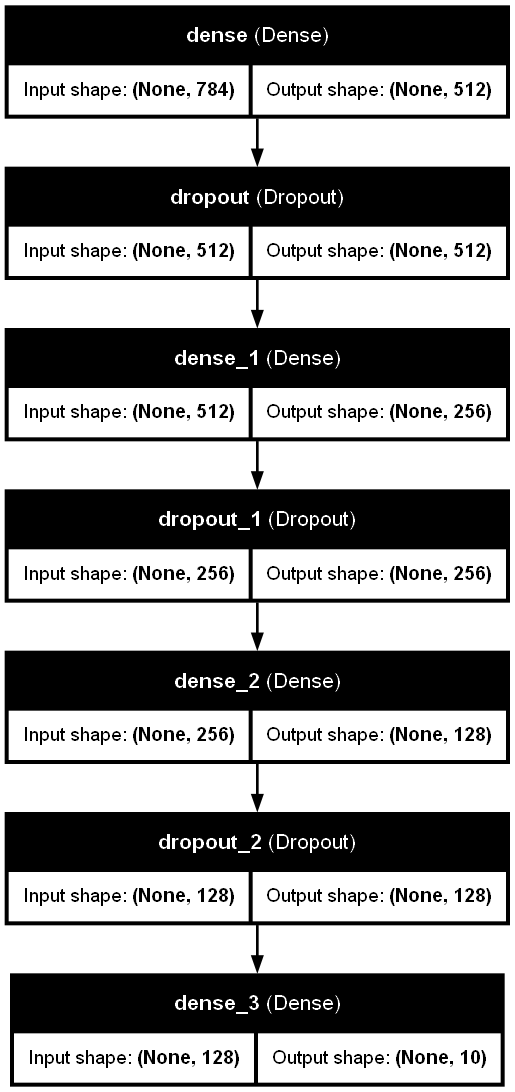

In [11]:
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from IPython.display import Image

plot_model(
    newmodel,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96
)


Image('model.png')


In [9]:
newmodel = create_model()

C:\Users\Dharun  M\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

Epoch 1/20


C:\Users\Dharun  M\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8520 - loss: 0.4810 - val_accuracy: 0.9670 - val_loss: 0.1131
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9612 - loss: 0.1255 - val_accuracy: 0.9740 - val_loss: 0.0862
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9715 - loss: 0.0912 - val_accuracy: 0.9774 - val_loss: 0.0754
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9783 - loss: 0.0713 - val_accuracy: 0.9765 - val_loss: 0.0860
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9807 - loss: 0.0631 - val_accuracy: 0.9803 - val_loss: 0.0645
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9845 - loss: 0.0519 - val_accuracy: 0.9784 - val_loss: 0.0793
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9851 - loss: 0.0465 - val_accuracy: 0.9794 - val_loss: 0.0746
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9876 - loss: 0.0422 - val_accuracy: 0.9797 - val_

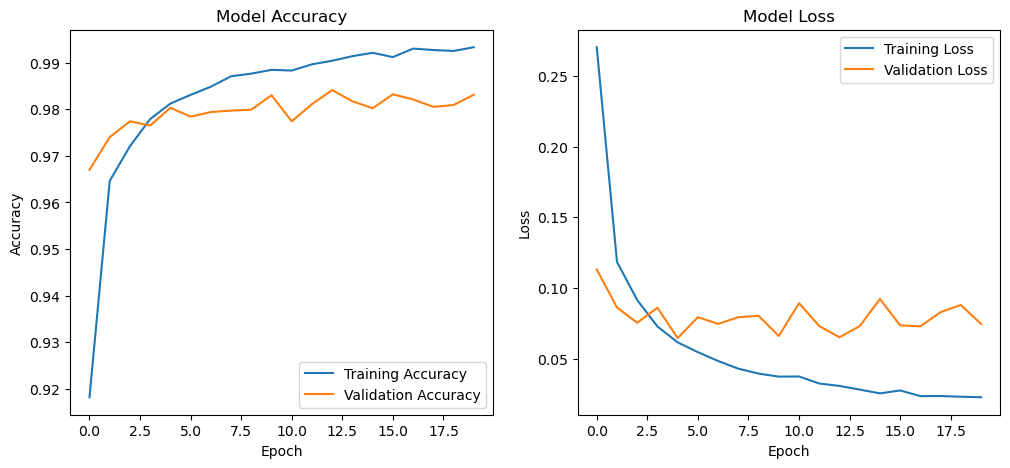

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



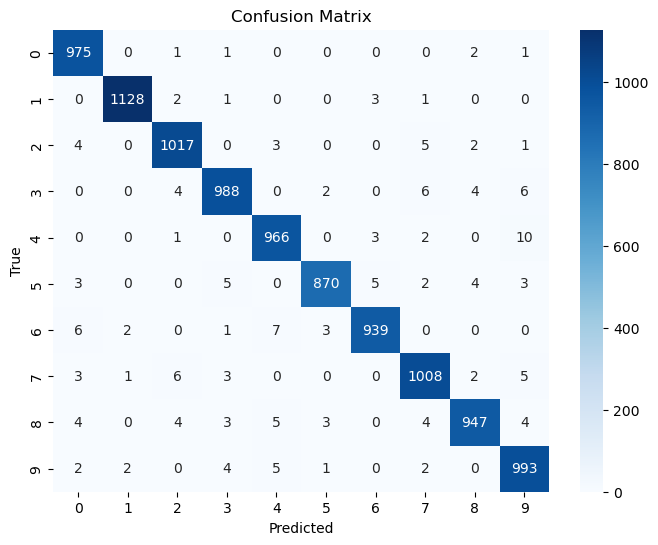

In [37]:
def train_and_evaluate_model():
    # Load and preprocess data
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

    # Create and compile the model
    model = create_model()

    # Train the model
    history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {test_acc:.4f}")

    # Visualize training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Predictions and metrics
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Classification report
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred_classes, digits=2))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

train_and_evaluate_model()